<a href="https://colab.research.google.com/github/cxurescry/fr-me/blob/main/Telegram_practice_ex_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%bash
pip install pytelegrambotapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 16.5 MB/s eta 0:00:00


In [ ]:
%%bash
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 12.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Пути к файлам с изображениями
cat_folder_path = '/content/gdrive/My Drive/Telebot-files/Practice-02/Images/Cat'
hedgehog_folder_path = '/content/gdrive/My Drive/Telebot-files/Practice-02/Images/Hedgehog'
bird_folder_path = '/content/gdrive/My Drive/Telebot-files/Practice-02/Images/Bird'
random_animal_folder_path = '/content/gdrive/My Drive/Telebot-files/Practice-02/Images/Random_Animal'

In [ ]:
import emoji
#https://unicode.org/emoji/charts/full-emoji-list.html
parrot_emoji = emoji.emojize(':parrot:')
cat_emoji = emoji.emojize(':cat:')
ok_emoji = emoji.emojize(':OK_hand:')
bot_emoji = emoji.emojize(':robot:')
pencil_emoji = emoji.emojize(':pencil:')
pen_emoji = emoji.emojize(':pen:')
check_mark_emoji = emoji.emojize(':check_mark:')
frowing_face_emoji=emoji.emojize(':slightly_frowning_face:')
puzzle_piece_emoji = emoji.emojize(':puzzle_piece:')
print(parrot_emoji)

🦜


In [ ]:
#Эмодзи, используемые на кнопках
cat_emoji = emoji.emojize(':cat:')
hedgehog_emoji = emoji.emojize(':hedgehog:')
bird_emoji = emoji.emojize(':bird:')
dragon_emoji = emoji.emojize(':dragon:')
print(cat_emoji,hedgehog_emoji,bird_emoji,dragon_emoji)

🐈 🦔 🐦 🐉


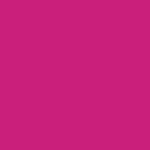

In [ ]:
#Библиотека Pillow для изображений
from PIL import Image
from PIL import ImageFilter
image = Image.new(mode="RGB", size=(150, 150),
                  color = (202, 31, 123))
image

In [ ]:
import telebot
#from io import BytesIO
#import numpy as np
from telebot import types
import os
import random

TELEGRAM_API_TOKEN = 'YOUR_TELEGRAM_API_TOKEN'
bot = telebot.TeleBot(TELEGRAM_API_TOKEN)

In [ ]:
#Функция получения изображения из папки folder_path
def get_random_image(folder_path):
  image_list = os.listdir(folder_path)
  file_name = random.choice(image_list)
  # print(file_name)
  image_path=folder_path+'/'+file_name
  # print(image_path)
  image = Image.open(image_path)
  return image

squirrel_image.jpg
/content/gdrive/My Drive/Telebot-files/Practice-02/Images/Random_Animal/squirrel_image.jpg


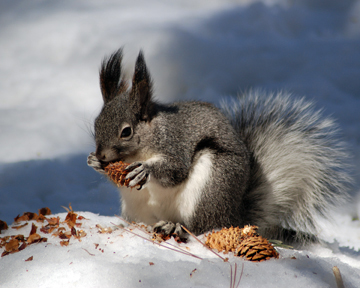

In [ ]:
animal_image = get_random_image(random_animal_folder_path)
animal_image

In [ ]:
#Функция для получения клавиатуры с кнопками разных эмодзи зверюшек
def get_select_animal_buttons():
  markup = types.InlineKeyboardMarkup()
  button_cat = types.InlineKeyboardButton(f'Кошаки {cat_emoji}',
                                            callback_data='cat_image')
  button_hedgehog = types.InlineKeyboardButton(f'Угадай кто {hedgehog_emoji}',
                                            callback_data='hedgehog_image')
  button_bird = types.InlineKeyboardButton(f'Птицы {bird_emoji}',
                                            callback_data='bird_image')
  button_random = types.InlineKeyboardButton(f'Рандом {dragon_emoji}',
                                            callback_data='random_animal_image')
  markup.row(button_cat, button_hedgehog)
  markup.row(button_bird, button_random)
  return markup

In [ ]:
#Функция для получения клавиатуры с кнопками приглашения
def get_start_buttons():
    markup = types.InlineKeyboardMarkup()
    button_select_from_collection = types.InlineKeyboardButton(f'Выбрать из коллекции {parrot_emoji}',
                                                               callback_data=
                                                               'select_from_collection')
    button_info = types.InlineKeyboardButton(f'Справка о боте {pencil_emoji}',
                                                   callback_data='bot_info')
    markup.add(button_select_from_collection)
    markup.add(button_info)
    return markup

In [ ]:
#Обработка команды /start
@bot.message_handler(content_types=['text'])
def start_bot(message):
  if message.text=='/start':
    markup = get_start_buttons()
    bot.send_message(message.chat.id, text='Выберите действие',
                   reply_markup=markup)
  else:
    bot.send_message(message.chat.id,f'Запустите бот {bot_emoji} командой /start')

In [ ]:
#Обработка нажатия кнопок
@bot.callback_query_handler(func = lambda call: True)
def callback_worker(call):
  if call.data=='select_from_collection':
    #Удаление предыдущего сообщения (в нашем случае - кнопок)
    bot.delete_message(chat_id = call.message.chat.id, message_id = call.message.id)
    markup = get_select_animal_buttons()
    bot.send_message(call.message.chat.id, text='Выберите зверюгу',
                   reply_markup=markup)
  elif call.data=='cat_image':
    bot.delete_message(call.message.chat.id,call.message.id)
    image = get_random_image(cat_folder_path)
    bot.send_photo(call.message.chat.id, image,
                   caption='Случайное изображение с котиком')
    markup = get_select_animal_buttons()
    bot.send_message(call.message.chat.id, text='Выберите зверюгу',
                   reply_markup=markup)
  elif call.data=='hedgehog_image':
    bot.delete_message(call.message.chat.id,call.message.id)
    image = get_random_image(hedgehog_folder_path)
    bot.send_photo(call.message.chat.id, image,
                   caption='Случайное изображение с ёжиком')
    markup = get_select_animal_buttons()
    bot.send_message(call.message.chat.id, text='Выберите зверюгу',
                   reply_markup=markup)
  elif call.data=='bird_image':
    bot.delete_message(call.message.chat.id,call.message.id)
    image = get_random_image(bird_folder_path)
    bot.send_photo(call.message.chat.id, image,
                   caption='Случайное изображение с птицей')
    markup = get_select_animal_buttons()
    bot.send_message(call.message.chat.id, text='Выберите зверюгу',
                   reply_markup=markup)
  elif call.data=='random_animal_image':
    bot.delete_message(call.message.chat.id,call.message.id)
    image = get_random_image(random_animal_folder_path)
    bot.send_photo(call.message.chat.id, image,
                   caption='Случайное изображение со зверушкой')
    markup = get_select_animal_buttons()
    bot.send_message(call.message.chat.id, text='Выберите зверюгу',
                   reply_markup=markup)
  elif call.data=='bot_info':
    bot.delete_message(call.message.chat.id,call.message.id)
    bot.send_message(call.message.chat.id, f'Бот {bot_emoji} выводит изображения по запросу')
    markup = get_start_buttons()
    bot.send_message(call.message.chat.id, text='Выберите действие',
                   reply_markup=markup)

In [ ]:
bot.polling(non_stop=True, interval=0)